In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is B233-0680

 Directory of C:\Jain Data Science\AI\Resume_Screening_app

18-01-2025  00:32    <DIR>          .
17-01-2025  18:58    <DIR>          ..
17-01-2025  18:59    <DIR>          .ipynb_checkpoints
18-01-2025  00:32           255,324 Resume_Screening_app.ipynb
17-01-2025  19:06         3,107,005 UpdatedResumeDataSet.csv
               2 File(s)      3,362,329 bytes
               3 Dir(s)  140,988,022,784 bytes free


In [55]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [56]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [57]:
df.shape

(962, 2)

In [60]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### Exploring Categories

In [61]:
df["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

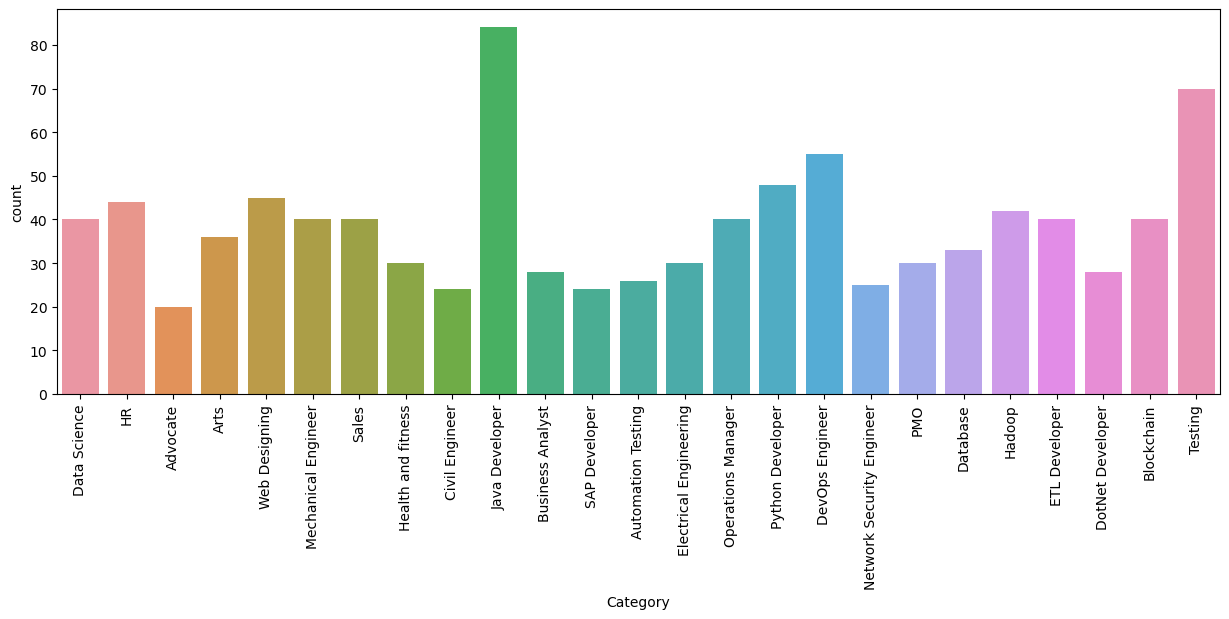

In [62]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["Category"])  
plt.xticks(rotation=90)
plt.show()

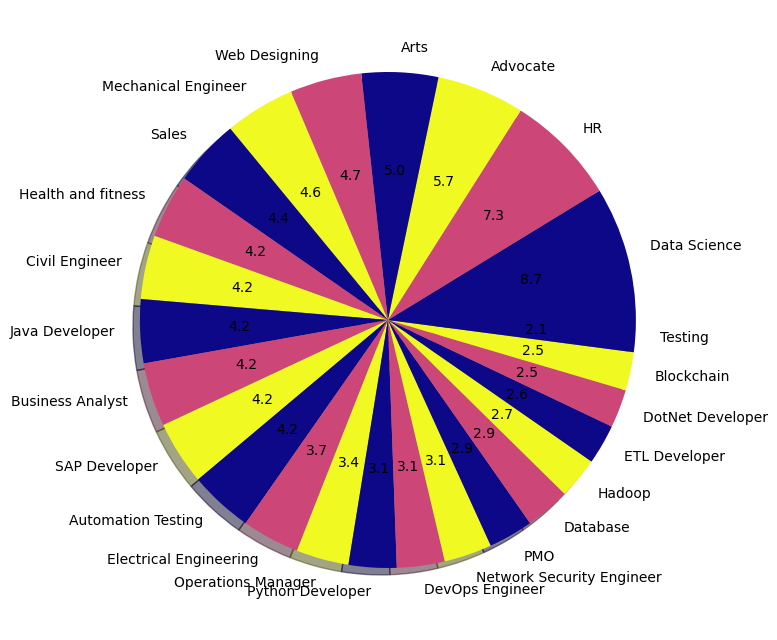

In [63]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()

plt.figure(figsize=(8,15))
plt.pie(counts,labels=labels,autopct="%1.1f",shadow=True,colors= plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

### Exploring Resume

In [64]:
df["Category"][0]

'Data Science'

In [65]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Cleaning Data

#### URLS,hashtags,mentions,special letters,punctuations

In [66]:
import re 
def cleanresume(txt):
    cleanTxt = re.sub('http\S+\s',' ',txt)
    cleanTxt = re.sub('RT|cc',' ',cleanTxt)
    cleanTxt = re.sub('#\S+s',' ',cleanTxt)
    cleanTxt = re.sub('@\S+',' ',cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""),' ',cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt = re.sub('\s+',' ',cleanTxt)

    return cleanTxt

In [67]:
cleanresume("my website like is this http://heloworld and access (&^$%$^%(&%&*$$%&>"":vvufyvhyug")

'my website like is this and a ess vvufyvhyug'

In [68]:
df["Resume"] = df['Resume'].apply(lambda x: cleanresume(x))

In [69]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

### Words Into Categorical Values

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
le.fit(df["Category"])
df['Category'] = le.transform(df["Category"])

In [73]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [74]:
# 'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      

### Vectorization

In [76]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
required_txt = tfidf.transform(df['Resume'])

In [79]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [81]:
required_txt

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

### Splitting

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(required_txt,df["Category"],test_size=0.2,random_state=42)

In [83]:
X_train.shape

(769, 7351)

In [84]:
X_test.shape

(193, 7351)

### Train the model and print the Classification Report

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


### Prediction System

In [91]:
import pickle 
pickle.dump(tfidf,open('tfidf.pk1','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [93]:
myresume = """im a datascientist specializing in machine learning , deep learning and computer vision. with a strong background in mathematics , 
im  passionate about uncovering hidden patterns and insights in data.i have extensive experience in developing
predictive models,implementing deep learning algorithms , and designing computer vision systems
.my technical skills include proficiency in python,sklearn,tensorflow and pytorch.
what sets me apart is my ability to effectively communincate complex concepts
to diverse audiences. excel in translating technical insights into actionable
reccomendations that drive informed decision making.if you are looking for 
a dedicated and versatile data scientist to collaborate on impactful projects, 
im eager to contribute my expertise.lets harness the power of data together to unlock new possibilities
and shape a better future
contact and sources 
email: uysdsayvdi@gmail.com'
phone: 03442876567
Github: http:bdusudu"""

In [94]:
import pickle

clf = pickle.load(open('clf.pkl','rb'))

cleaned_resume = cleanresume(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15:'Java Developer',
    23:'Testing',
    8:'DevOps Engineer',
    20:'Python Developer',
    24:'Web Designing',
    12:'HR',
    13:'Hadoop',
    3:'Blockchain',
    10:'ETL Developer',
    18:'Operations Manager',
    6:'Data Science',
    22:'Sales',
    16:'Mechanical Engineer',
    1:'Arts',
    7:'Database',
    11:'Electrical Engineering',
    14:'Health and Fitness',
    19:'PMO',
    4:'Businees Analyst',
    9:'DotNet Developer',
    2:'Automation Testing',
    17:'Network Security Engineer',
    21:'SAP Developer',
    5:'Civil Engineer',
    0:'Advocate',
    
}
category_name = category_mapping.get(prediction_id,'Unknown')
print('predicted Category: ',category_name)

predicted Category:  Data Science


In [95]:
prediction_id

6